In [1]:
import cv2

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter



In [2]:
# load the image
image_view = cv2.imread('bach/bach-1.png')
image = cv2.cvtColor(image_view, cv2.COLOR_RGB2GRAY)

rows = image.shape[0]
cols = image.shape[1]

print (image.shape)
print("rows :", rows)
print("cols :", cols)

#plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
#plt.show()

(2200, 1700)
rows : 2200
cols : 1700


In [3]:
#compute row and colomn sums
col_sum = image.sum(axis=0)
row_sum = image.sum(axis=1)


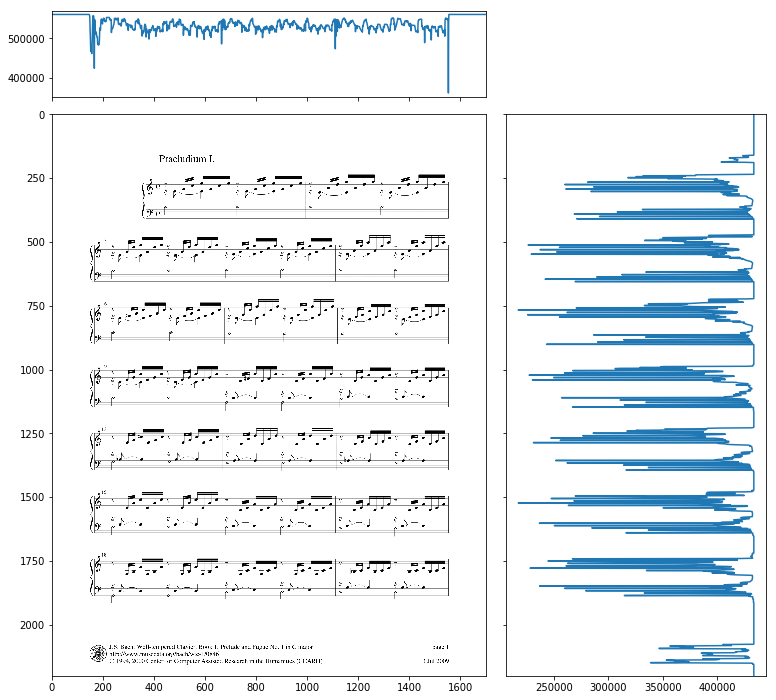

In [4]:
nullfmt = NullFormatter()         # no labels

plt.figure(figsize=(12, 12))

axe_img = plt.axes([0.1, 0.1, 0.65, 0.65]) # [0.125,0.125;0.775x0.755] default
axe_img.imshow(image_view) #, cmap = 'gray')

axe_col = plt.axes([ 0.1 + (1 - cols/rows) * 0.65 / 2, 0.77, 0.65 * cols / rows, 0.1])
axe_row = plt.axes([0.7,  0.1, 0.3, 0.65])

axe_col.xaxis.set_major_formatter(nullfmt)
axe_row.yaxis.set_major_formatter(nullfmt)

axe_col.plot(col_sum)
axe_row.plot(row_sum, range(2200))

axe_col.set_xlim(axe_img.get_xlim())
axe_row.set_ylim(axe_img.get_ylim())

plt.show()

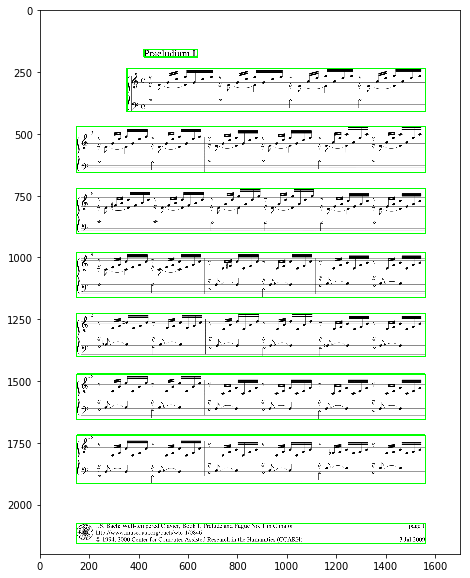

In [7]:
blankline = row_sum.max()

is_blank = row_sum[0] == blankline
top = 0
bottom = 0

rois = []

for row in range(rows):
    if (is_blank): # previous line was blank
        if (row_sum[row] < blankline): # current line is not blank
            top = row
            is_blank = False
            
    else: # previous line was not blank
        if (row_sum[row] == blankline): # current line is blank
            bottom = row
            is_blank = True
            
            block = image[top-1:bottom+1,:]
            block_col_sum = block.sum(axis=0)
            
            
            blankcol = block_col_sum.max()
            is_blank = block_col_sum[0] == blankcol
            left = 0
            while (block_col_sum[left] == blankcol):
                left = left + 1
                
            right = cols - 1
            while (block_col_sum[right] == blankcol):
                right = right - 1
            
            rois.append((top-1, bottom+1, left-1, right+1))
                        
    
#print (rois)

for roi in rois:
    cv2.rectangle(image_view, (roi[2],roi[0]), (roi[3],roi[1]), (0,255,0), 3) # (l,t) (r,b)

plt.figure(figsize = (10,10))
plt.imshow(image_view)
plt.show()

# fig, axes = plt.subplots(len(rois), sharex=True, figsize=(20,20))
# for roi_index in range(len(rois)):
#     axes[roi_index].imshow(image[rois[roi_index][0]:rois[roi_index][1],rois[roi_index][2]:rois[roi_index][3]])

# cv2.imshow('image',image[rois[0][0]:rois[0][1],rois[0][2]:rois[0][3]])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

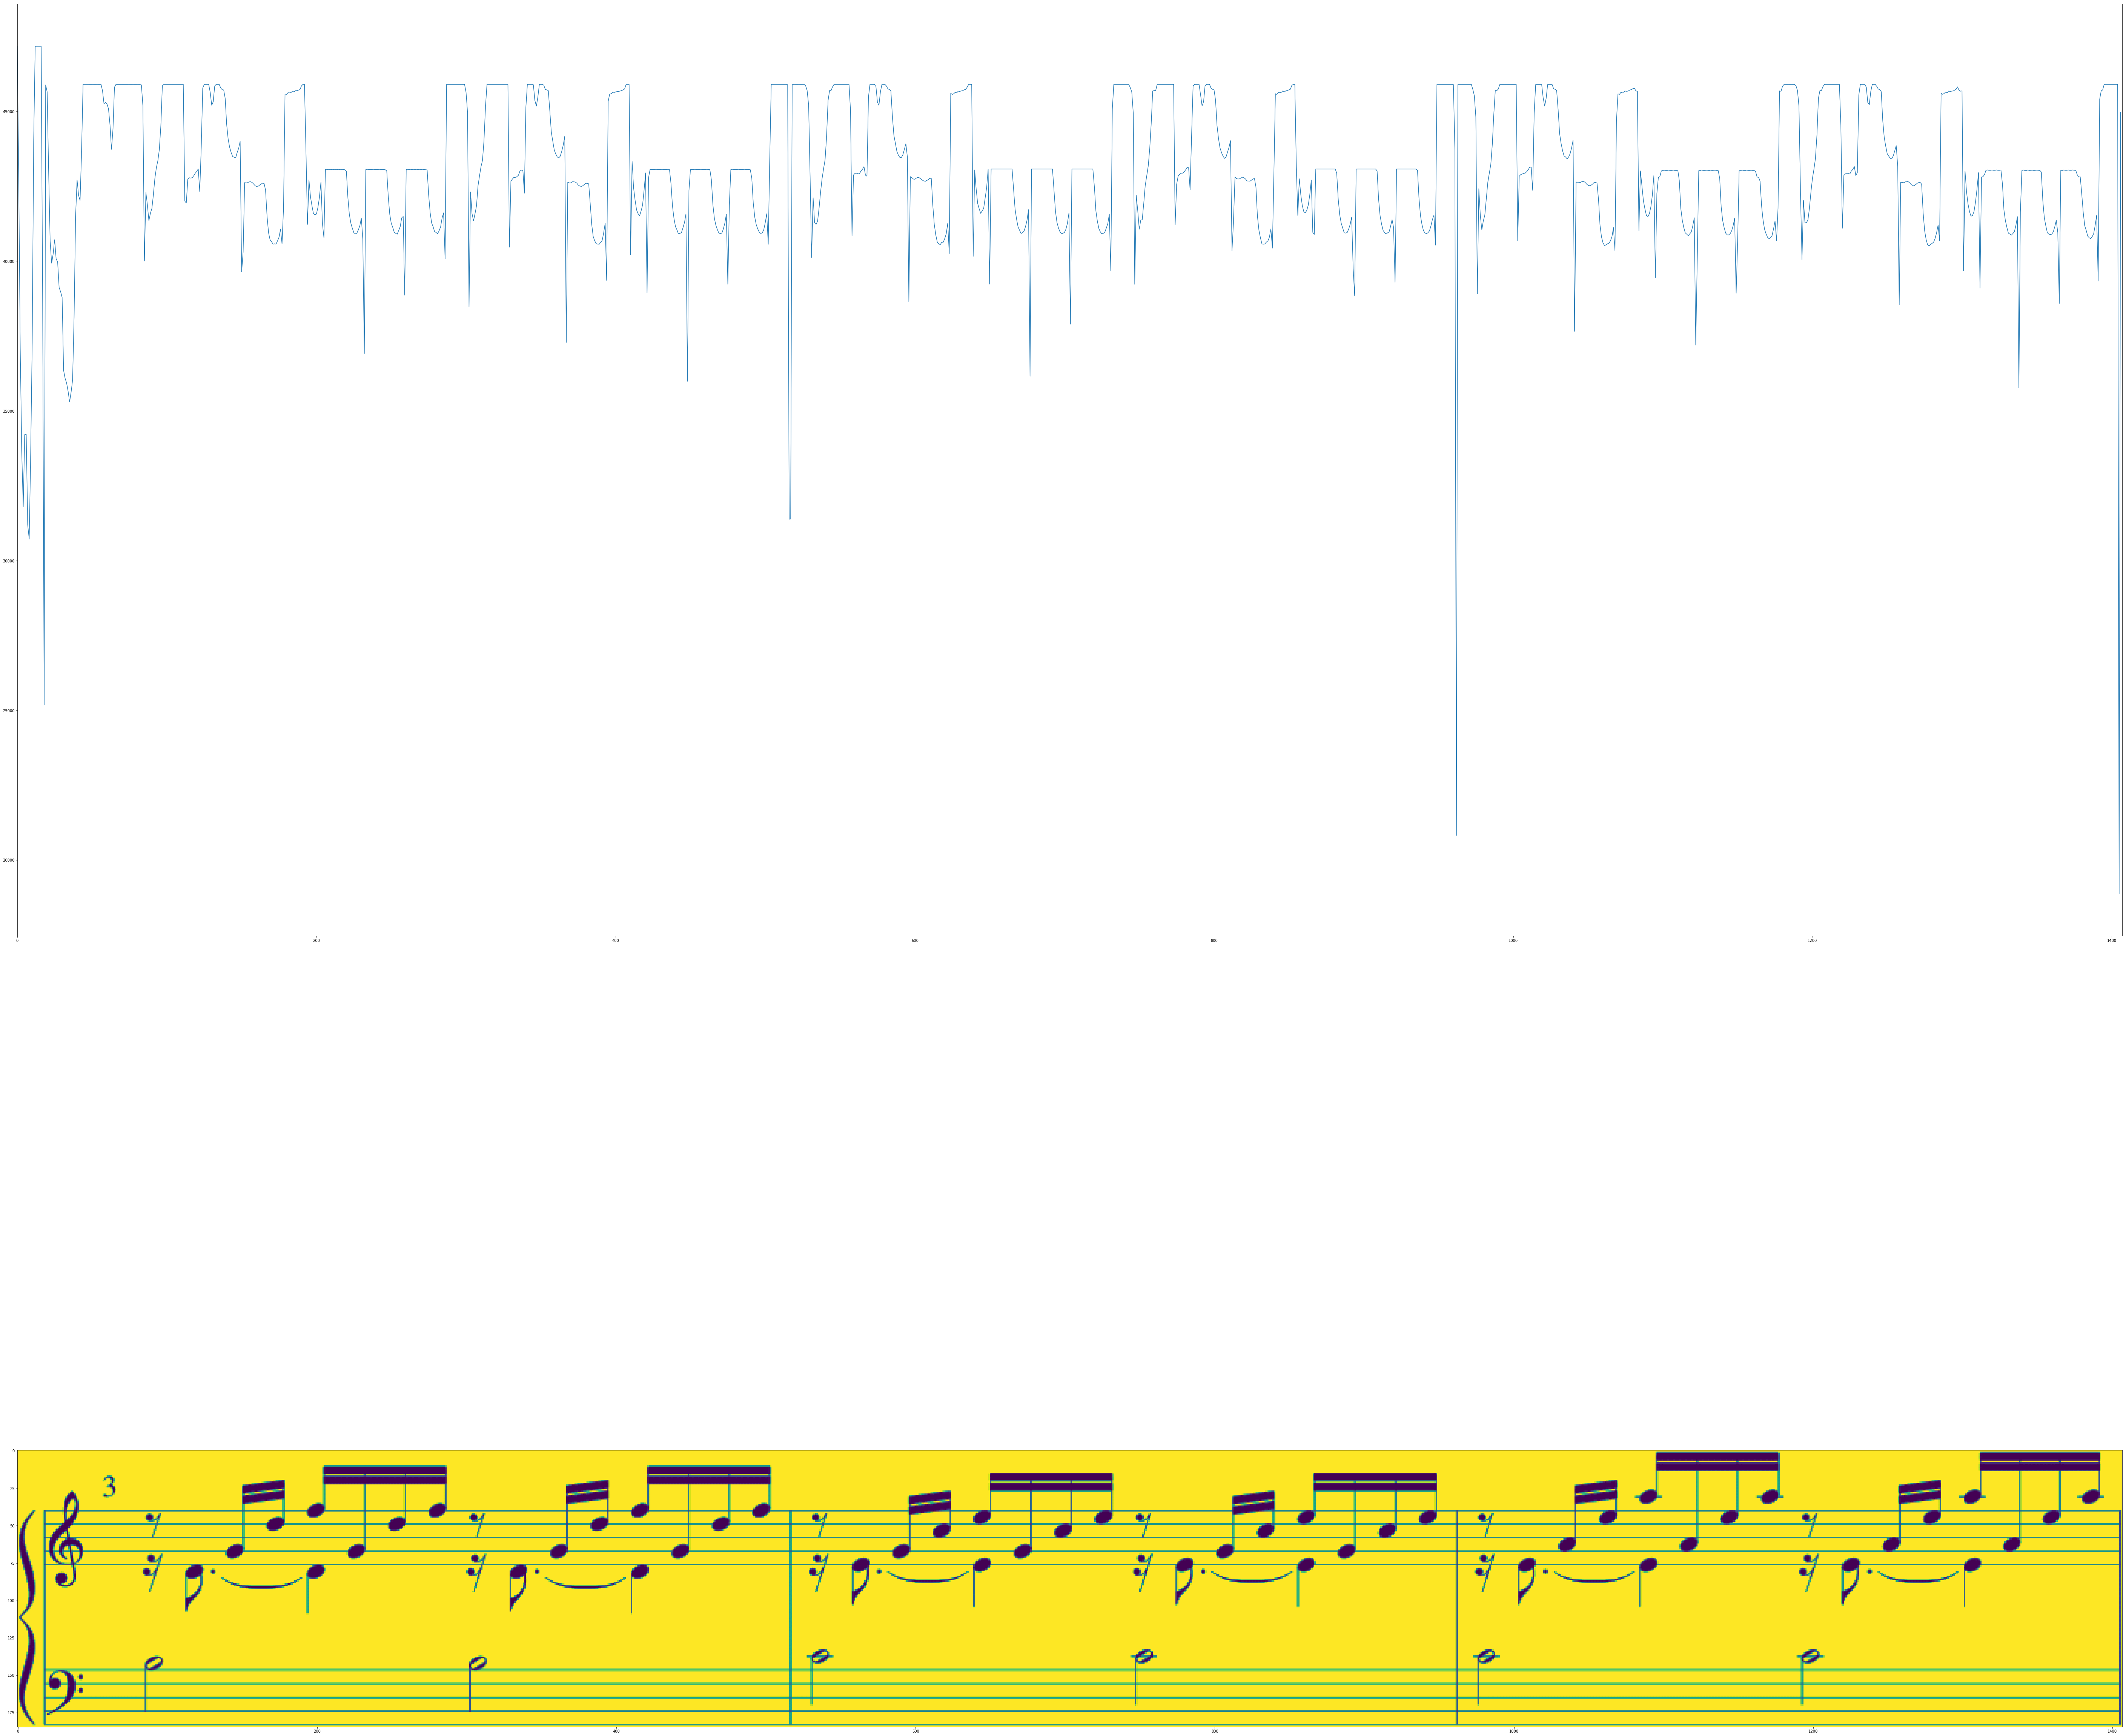

In [29]:
system = image[rois[2][0]:rois[2][1],rois[2][2]:rois[2][3]]

system_col = system.sum(axis=0)

plt.figure(figsize=(100, 100))

plt.subplot(211).set_xlim((0,system.shape[1]))
plt.plot(system_col)


plt.subplot(212)
plt.imshow(system)

plt.show()
